<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_06/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  回帰
回帰は、教師あり学習の一種で、変数間の関係を予測します。  
今回は、単回帰と重回帰の２つを解説します。

## ●データセットの読み込み
ボストン住宅価格のデータセットを読み込みます。  
このデータセットには、**説明変数**と**目的変数**が含まれます。  
**説明変数**: 何かの原因となっている変数  
**目的変数**: その原因を受けて発生した結果である変数

In [37]:
import pandas as pd

# load_boston関数は、scikit-learnのバージョン1.2から削除
# from sklearn import datasets
# boston = datasets.load_boston()
# boston = datasets.load_boston()
# データフレームとして変換
# boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)  # data: 説明変数

# OpenMLからBoston Housingデータを取得
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.frame

boston_df["PRICE"] = boston.target  # target: 目的変数
boston_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


説明変数が様々な住宅の特徴で、目的変数が住宅の価格であることが分かります。  
各列のラベルの意味は、`DESCR`により表示することができます。

In [38]:
print(boston.DESCR)  # データセットの説明

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

データセットの特徴を把握するために、統計量を表示します。

In [39]:
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


データセットを、訓練用のデータとテスト用のデータに分割します。

In [40]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(boston.data, boston.target, random_state=0)

## ●単回帰
単回帰では、直線を使い1つの説明変数で目的変数を予測します。  
$x$を説明変数、$y$を目的変数、$a$を係数、$b$を切片としたとき、単回帰は以下の式で表されます。  
$$y = ax + b$$

In [41]:
from sklearn import linear_model

# RM（部屋数）の列を取得
# x_rm_train = x_train[:, [5]]
# x_rm_test = x_test[:, [5]]

x_rm_train = x_train.iloc[:, [5]].values
x_rm_test = x_test.iloc[:, [5]].values

model = linear_model.LinearRegression() # 線形回帰モデル
model.fit(x_rm_train, t_train)  # モデルの訓練

LinearRegression()

係数と切片を取得します。

In [42]:
a = model.coef_ # 係数
b = model.intercept_ # 切片
print("a: ", a)
print("b: ", b)

a:  [9.31294923]
b:  -36.180992646339206


データ及び回帰直線をグラフで表示します。

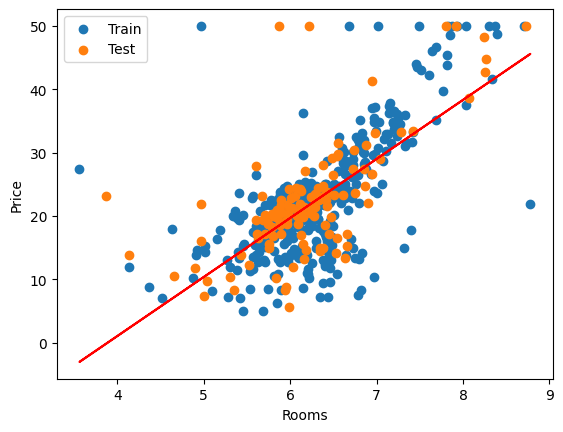

In [43]:
import matplotlib.pyplot as plt

plt.scatter(x_rm_train, t_train, label="Train")
plt.scatter(x_rm_test, t_test, label="Test")

y_reg = a * x_rm_train + b  # 回帰直線
plt.plot(x_rm_train, y_reg, c="red")

plt.xlabel("Rooms")
plt.ylabel("Price")
plt.legend()
plt.show()

モデルをMSE（平均二乗誤差 Mean Squared Error）を計算します。  

MSEは、$E$を誤差、$y_k$を予測値、$t_k$を正解値として以下の式で定義されます。

$$ E = \frac{1}{n} \sum_{k=1}^n(y_k-t_k)^2 $$

この誤差が小さいほどモデルの誤差が小さくなります。  

以下のコードは、訓練データとテストデータ、それぞれでMSEを計算します。

In [44]:
from sklearn.metrics import mean_squared_error

# 訓練データ
y_train = model.predict(x_rm_train)
mse_train = mean_squared_error(t_train, y_train)
print("MSE(Train): ", mse_train)

# テストデータ
y_test = model.predict(x_rm_test)
mse_test = mean_squared_error(t_test, y_test)
print("MSE(Test): ", mse_test)

MSE(Train):  43.71870658739849
MSE(Test):  43.472041677202206


## ●重回帰
重回帰では、複数の説明変数を使い目的変数を予測します。  
重回帰は、$x_k$を各説明変数として以下の式で表されます。

$$ y = \sum_{k=1}^na_kx_k + b $$

今回は、13種類の説明変数を全て使って重回帰分析を行います。

In [45]:
model = linear_model.LinearRegression() # 線形回帰

# 全ての説明変数を使い学習
x_train = x_train.values
t_train = t_train.values

model.fit(x_train, t_train)

LinearRegression()

各説明変数に対応した係数を取得します。

In [46]:
a_df = pd.DataFrame(boston.feature_names, columns=["Exp"])
a_df["a"] = pd.Series(model.coef_)
a_df

,Exp,a
0,CRIM,-0.117735
1,ZN,0.044017
2,INDUS,-0.005768
3,CHAS,2.393416
4,NOX,-15.589421
5,RM,3.768968
6,AGE,-0.007035
7,DIS,-1.434956
8,RAD,0.240081
9,TAX,-0.011297


切片を取得します。

In [47]:
print("b: ", model.intercept_)

b:  36.93325545711923


訓練データとテストデータ、それぞれでMSE（平均二乗誤差）を計算します。

In [48]:
# 訓練データ
y_train = model.predict(x_train)
mse_train = mean_squared_error(t_train, y_train)
print("MSE(Train): ", mse_train)

# テストデータ
x_test = x_test.values
t_test = t_test.values

y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)
print("MSE(Test): ", mse_test)

MSE(Train):  19.640519427908043
MSE(Test):  29.782245092302375


単回帰の場合よりも誤差が小さくなりました。  
ただ、テストデータの誤差は訓練データの誤差よりも大幅に大きくなりました。  
モデルが訓練データに過剰に適合していないか、慎重に判断する必要があります。